In [1]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

cp: cannot stat 'kaggle.json': No such file or directory


In [2]:
!kaggle datasets download -d salader/dogs-vs-cats

Dataset URL: https://www.kaggle.com/datasets/salader/dogs-vs-cats
License(s): unknown
 99% 1.06G/1.06G [00:21<00:00, 112MB/s]
100% 1.06G/1.06G [00:21<00:00, 53.9MB/s]


In [3]:
import zipfile
zip_ref = zipfile.ZipFile('/content/dogs-vs-cats.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [4]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten

In [34]:
# Generators
train_ds=keras.utils.image_dataset_from_directory(
    directory='/content/train',
    labels='inferred',
    label_mode='int',
    batch_size=32,
    image_size=(150,150)
)


validation_ds=keras.utils.image_dataset_from_directory(
    directory='/content/test',
    labels='inferred',
    label_mode='int',
    batch_size=32,
    image_size=(150,150)
)


Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


In [35]:
#Normalize
def process(image,label):
  image=tf.cast(image/255. ,tf.float32)
  return image,label

train_ds=train_ds.map(process)
validation_ds=validation_ds.map(process)

# Create CNN Model


In [36]:
from keras.preprocessing.image import ImageDataGenerator

In [37]:
batch_size = 16

# this is the augmentation configuration we will use for training
train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)

# this is the augmentation configuration we will use for testing:
# only rescaling
test_datagen = ImageDataGenerator(rescale=1./255)

# this is a generator that will read pictures found in
# subfolers of 'data/train', and indefinitely generate
# batches of augmented image data
train_generator = train_datagen.flow_from_directory(
        '/content/dogs_vs_cats/train',  # this is the target directory
        target_size=(150, 150),  # all images will be resized to 150x150
        batch_size=batch_size,
        class_mode='binary')  # since we use binary_crossentropy loss, we need binary labels

# this is a similar generator, for validation data
validation_generator = test_datagen.flow_from_directory(
        '/content/dogs_vs_cats/test',
        target_size=(150, 150),
        batch_size=batch_size,
        class_mode='binary')

Found 20000 images belonging to 2 classes.
Found 5000 images belonging to 2 classes.


In [38]:
from keras.layers import BatchNormalization, Dropout

In [39]:
model=Sequential()

model.add(Conv2D(32,kernel_size=(3,3),activation='relu',padding='valid',input_shape=(150,150,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),padding='valid',strides=2))

model.add(Conv2D(64,kernel_size=(3,3),activation='relu',padding='valid'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),padding='valid',strides=2))

model.add(Conv2D(128,kernel_size=(3,3),activation='relu',padding='valid'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),padding='valid',strides=2))

model.add(Flatten())

model.add(Dense(128,activation='relu' ))
model.add(Dropout(0.1))
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.1))

model.add(Dense(1,activation='sigmoid'))


In [40]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [41]:
# Example adjustment - ensure correct batch size and steps calculation
history = model.fit(
    train_generator,
    epochs=10,
    validation_data=validation_generator
)



Epoch 1/10
1250/1250 [==============================] - 160s 123ms/step - loss: 0.8249 - accuracy: 0.6029 - val_loss: 0.9449 - val_accuracy: 0.5748
Epoch 2/10
1250/1250 [==============================] - 148s 119ms/step - loss: 0.5814 - accuracy: 0.6820 - val_loss: 0.6349 - val_accuracy: 0.7128
Epoch 3/10
1250/1250 [==============================] - 146s 116ms/step - loss: 0.5091 - accuracy: 0.7429 - val_loss: 0.5160 - val_accuracy: 0.7470
Epoch 4/10
1250/1250 [==============================] - 147s 118ms/step - loss: 0.4351 - accuracy: 0.7922 - val_loss: 0.4270 - val_accuracy: 0.8012
Epoch 5/10
1250/1250 [==============================] - 147s 117ms/step - loss: 0.3845 - accuracy: 0.8235 - val_loss: 0.3733 - val_accuracy: 0.8366
Epoch 6/10
1250/1250 [==============================] - 146s 117ms/step - loss: 0.3489 - accuracy: 0.8442 - val_loss: 0.3714 - val_accuracy: 0.8336
Epoch 7/10
1250/1250 [==============================] - 145s 116ms/step - loss: 0.3148 - accuracy: 0.8624 - val_

In [ ]:
# previous Epochs
# history=model.fit(train_ds,epochs=10,validation_data=validation_ds)

Epoch 1/10
625/625 [==============================] - 68s 102ms/step - loss: 1.3542 - accuracy: 0.5777 - val_loss: 0.6088 - val_accuracy: 0.6718
Epoch 2/10
625/625 [==============================] - 67s 107ms/step - loss: 0.6072 - accuracy: 0.6796 - val_loss: 0.5963 - val_accuracy: 0.6626
Epoch 3/10
625/625 [==============================] - 69s 110ms/step - loss: 0.4929 - accuracy: 0.7659 - val_loss: 1.5567 - val_accuracy: 0.5374
Epoch 4/10
625/625 [==============================] - 68s 109ms/step - loss: 0.4273 - accuracy: 0.8055 - val_loss: 0.4352 - val_accuracy: 0.7944
Epoch 5/10
625/625 [==============================] - 67s 107ms/step - loss: 0.3728 - accuracy: 0.8350 - val_loss: 0.5504 - val_accuracy: 0.7424
Epoch 6/10
625/625 [==============================] - 67s 107ms/step - loss: 0.3202 - accuracy: 0.8635 - val_loss: 0.4490 - val_accuracy: 0.7994
Epoch 7/10
625/625 [==============================] - 64s 102ms/step - loss: 0.2502 - accuracy: 0.8931 - val_loss: 0.5727 - val_ac

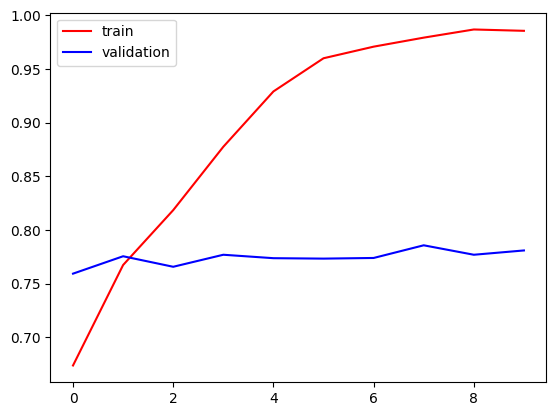

In [ ]:
# Without any Overfitting method
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

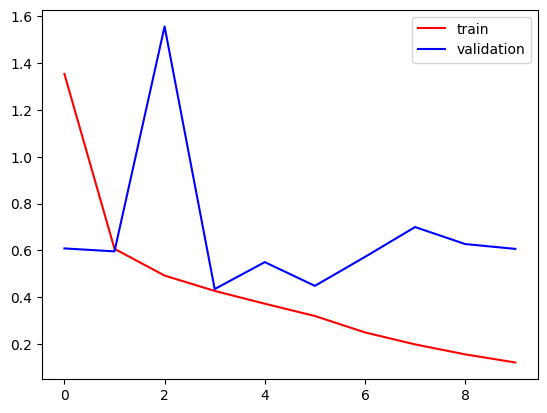

In [ ]:
# without any Overfitting Method
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()

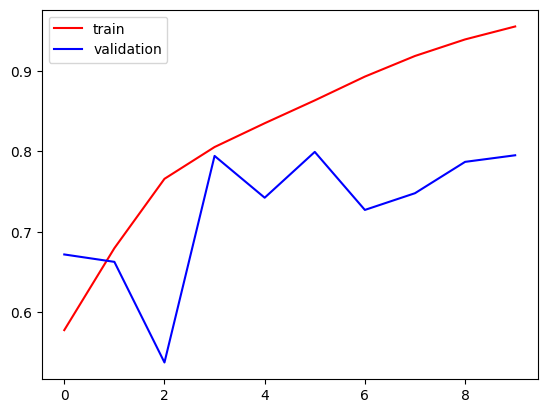

In [ ]:
#Batch Normalization +Dropout
plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

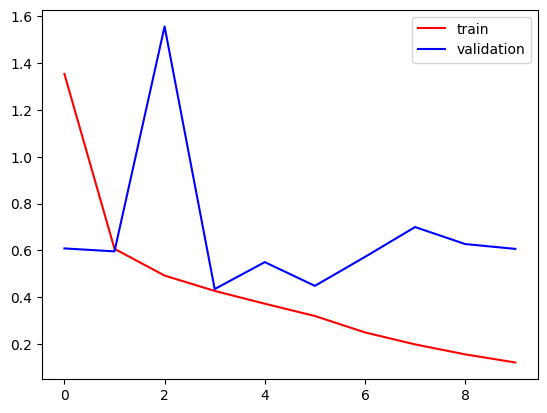

In [ ]:
# Batch Normalization +Dropout
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()

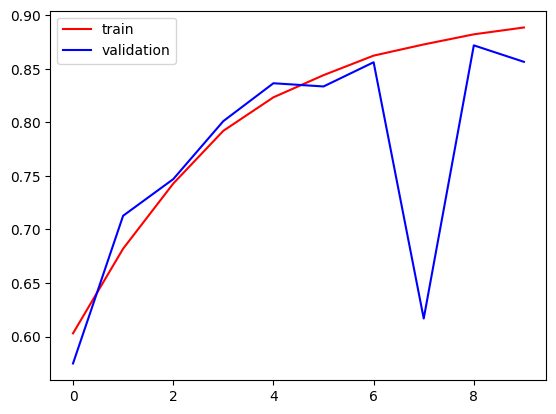

In [42]:
# using Data Augmentaion +Batch Normalization +Dropout
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

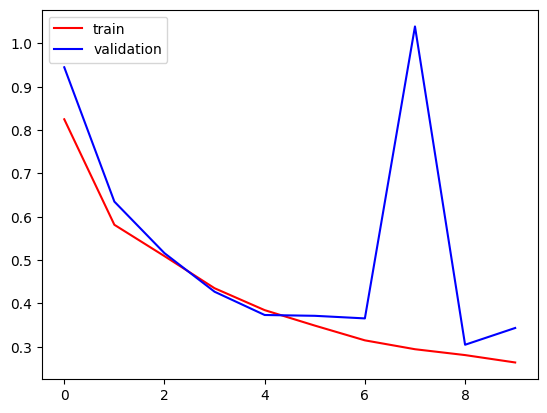

In [43]:
# using Data Augmentaion +Batch Normalization +Dropout
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()

clearly see Overfitting ho raha h

In [ ]:
# way to reduce overfitting is:
 # ADD more data
 # Data Augmentation
 # L1/L2 Regularization
 # Dropout
 # Batch Normalization
 # Reduce Complexity


In [ ]:
import cv2


In [ ]:
test_img=cv2.imread('/content/pred/dog3.jpeg')

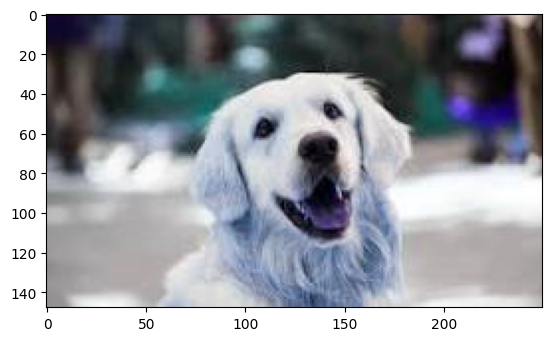

In [ ]:
plt.imshow(test_img)

In [ ]:
test_img.shape

(148, 250, 3)

In [ ]:
test_img=cv2.resize(test_img,(256,256))

In [ ]:
test_input=test_img.reshape((1,256,256,3))

In [ ]:
model.predict(test_input)

1/1 [==============================] - 0s 20ms/step


array([[1.]], dtype=float32)

1/1 [==============================] - 0s 30ms/step


array([[0.]], dtype=float32)

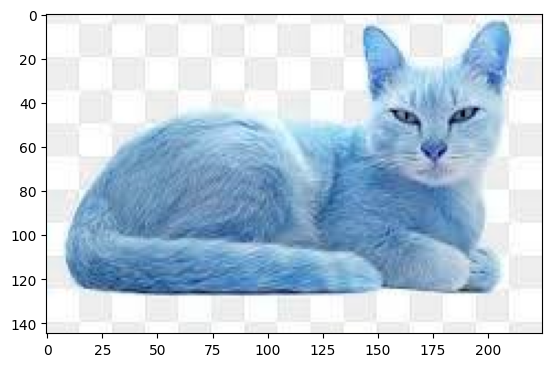

In [ ]:
test_img=cv2.imread('/content/pred/download (1).jpeg')
plt.imshow(test_img)
test_img=cv2.resize(test_img,(256,256))
test_input=test_img.reshape((1,256,256,3))
model.predict(test_input)

1/1 [==============================] - 0s 17ms/step


array([[0.]], dtype=float32)

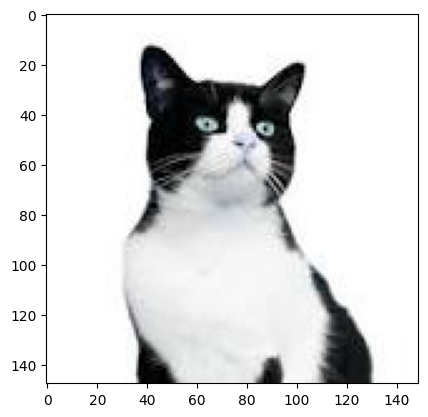

In [ ]:
test_img=cv2.imread('/content/pred/download (2).jpeg')
plt.imshow(test_img)
test_img=cv2.resize(test_img,(256,256))
test_input=test_img.reshape((1,256,256,3))
model.predict(test_input)

1/1 [==============================] - 0s 27ms/step


array([[0.]], dtype=float32)

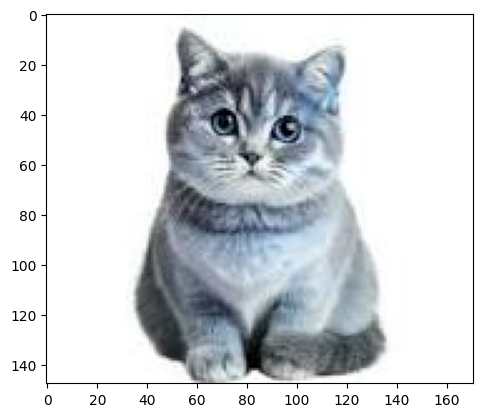

In [ ]:
test_img=cv2.imread('/content/pred/download.jpeg')
plt.imshow(test_img)
test_img=cv2.resize(test_img,(256,256))
test_input=test_img.reshape((1,256,256,3))
model.predict(test_input)

1/1 [==============================] - 0s 29ms/step


array([[1.]], dtype=float32)

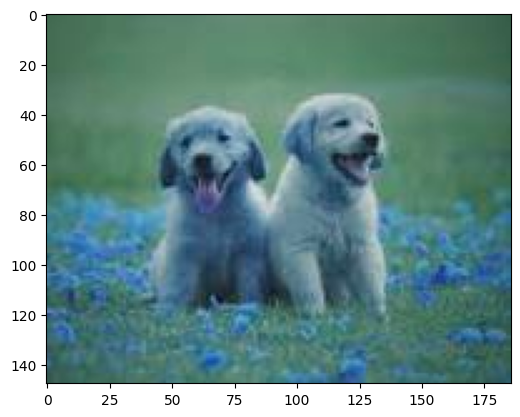

In [ ]:
test_img=cv2.imread('/content/pred/dog1.jpeg')
plt.imshow(test_img)
test_img=cv2.resize(test_img,(256,256))
test_input=test_img.reshape((1,256,256,3))
model.predict(test_input)

1/1 [==============================] - 0s 31ms/step


array([[1.]], dtype=float32)

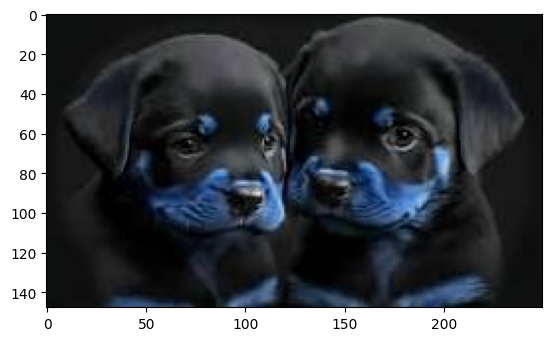

In [ ]:
test_img=cv2.imread('/content/pred/dog2.jpeg')
plt.imshow(test_img)
test_img=cv2.resize(test_img,(256,256))
test_input=test_img.reshape((1,256,256,3))
model.predict(test_input)

1/1 [==============================] - 0s 29ms/step


array([[1.]], dtype=float32)

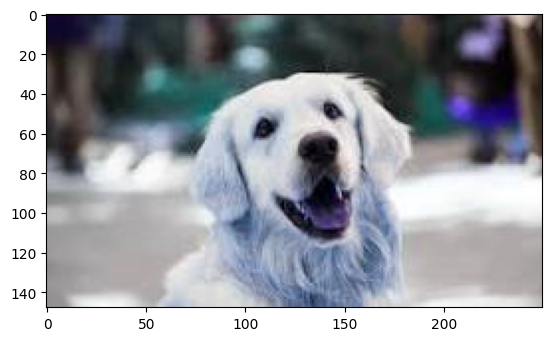

In [ ]:
test_img=cv2.imread('/content/pred/dog3.jpeg')
plt.imshow(test_img)
test_img=cv2.resize(test_img,(256,256))
test_input=test_img.reshape((1,256,256,3))
model.predict(test_input)